# Analisis Dataset diabetes

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy
from sklearn.preprocessing import OrdinalEncoder
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from imblearn.over_sampling import RandomOverSampler

# Import required libraries for performance metrics
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


# Import required libraries for machine learning classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("diabetic_data.csv")

Primero haremos una mirada a los datos

In [3]:
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        101766 non-null object
gender                      101766 non-null object
age                         101766 non-null object
weight                      101766 non-null object
admission_type_id           101766 non-null int64
discharge_disposition_id    101766 non-null int64
admission_source_id         101766 non-null int64
time_in_hospital            101766 non-null int64
payer_code                  101766 non-null object
medical_specialty           101766 non-null object
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient            10176

Al parecer, no existe datos nulos, lo cual es muy bueno.

In [6]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
df.duplicated().sum()

0

In [8]:
df[df.duplicated(keep=False)]

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted


Al parecer tampoco hay datos duplicados tampoco, sin embargo al experimentar las columnas vemos que en vez de nulos existen los valores de ?. Por lo tanto haremos una transformación de las columnas.

In [9]:
diag_1 = Counter(list(df['diag_1'])).most_common(1)[0][0]
diag_2 = Counter(list(df['diag_2'])).most_common(1)[0][0]
diag_3 = Counter(list(df['diag_3'])).most_common(1)[0][0]
df['diag_1'] = df['diag_1'].apply(lambda x : diag_1 if x == '?' else x)
df['diag_2'] = df['diag_2'].apply(lambda x : diag_2 if x == '?' else x)
df['diag_3'] = df['diag_3'].apply(lambda x : diag_3 if x == '?' else x)

In [10]:
df=df.replace('?',np.nan)

In [11]:
df['change'] = df['change'].apply(lambda x : 1 if x == 'Ch'
                                                 else -1)


df['diabetesMed'] = df['diabetesMed'].apply(lambda x : -1 if x == 'No'
                                                else 1)


df['max_glu_serum'] = df['max_glu_serum'].apply(lambda x : 200 if x == '>200' else ( 300 if x == '>300' else ( 100 if x == 'Norm' else  0)))

df['A1Cresult'] = df['A1Cresult'].apply(lambda x : 7 if x == '>7'  else (8 if  x == '>8' else ( 5 if x == 'Norm' else 0)))

enc = OrdinalEncoder()
df[["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]] = enc.fit_transform(df[["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "examide", "citoglipton", "insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]])
                                                               

Por otro lado, leyendo la información de los datos vamos a borrar los numeros de discharge que sean 11,13,14,19,20,21 debido a que estan relacionados con pacientes fallecidos y la idea es crear un modelo que prediga la vuelta de los pacientes. 

In [12]:
df = df[~df.discharge_disposition_id.isin([11,13,14,19,20,21])]

Tambien convertimos la variable de edad a una columna numerica para poder trabajar con ella.

In [13]:
replaceDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

df['age'] = df['age'].apply(lambda x : replaceDict[x])
df['age'].value_counts()

75    25331
65    22059
55    17060
85    16434
45     9607
35     3764
95     2589
25     1649
15      690
5       160
Name: age, dtype: int64

# Data Analysis

## One Variable Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99343 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                99343 non-null int64
patient_nbr                 99343 non-null int64
race                        97109 non-null object
gender                      99343 non-null object
age                         99343 non-null int64
weight                      3125 non-null object
admission_type_id           99343 non-null int64
discharge_disposition_id    99343 non-null int64
admission_source_id         99343 non-null int64
time_in_hospital            99343 non-null int64
payer_code                  59945 non-null object
medical_specialty           50727 non-null object
num_lab_procedures          99343 non-null int64
num_procedures              99343 non-null int64
num_medications             99343 non-null int64
number_outpatient           99343 non-null int64
number_emergency            99343 non-null int64
number_inpatient            99343 non-null int64
diag

In [15]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

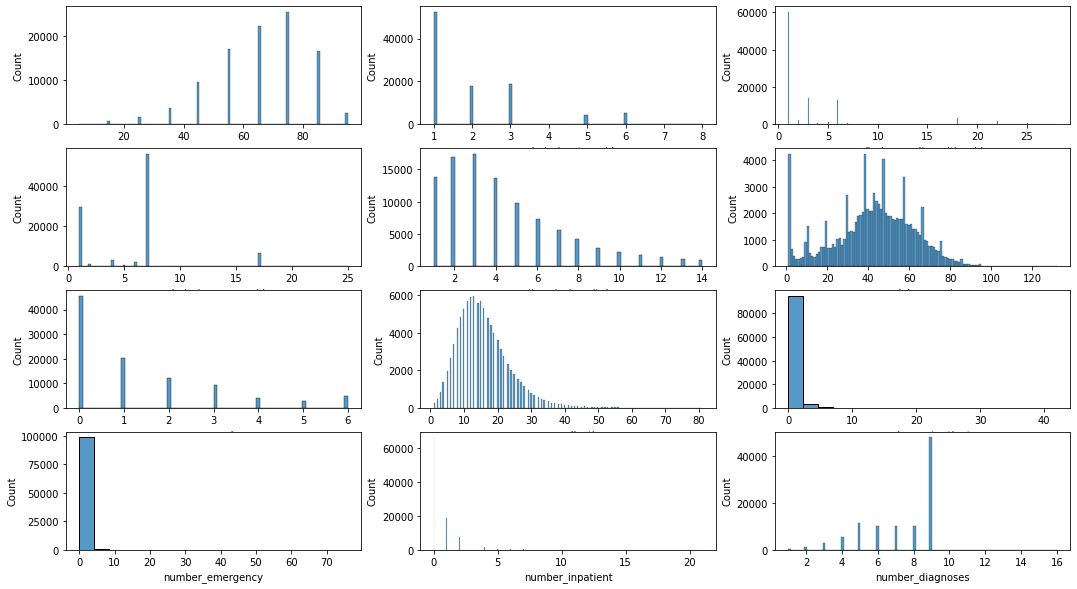

In [16]:
numerical=['age','admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses']

plt.figure(figsize=(18,10))
for i in range(0,len(numerical)):
    plt.subplot(4,3,i+1)
    sns.histplot(data=df, x=numerical[i])

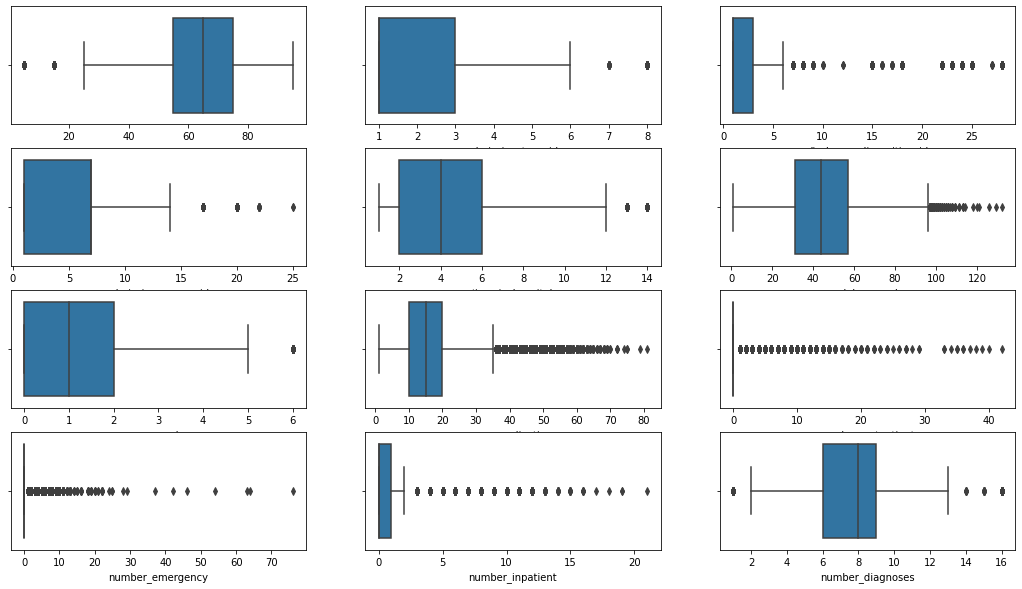

In [17]:
plt.figure(figsize=(18,10))
for i in range(0,len(numerical)):
    plt.subplot(4,3,i+1)
    sns.boxplot(data=df, x=numerical[i])

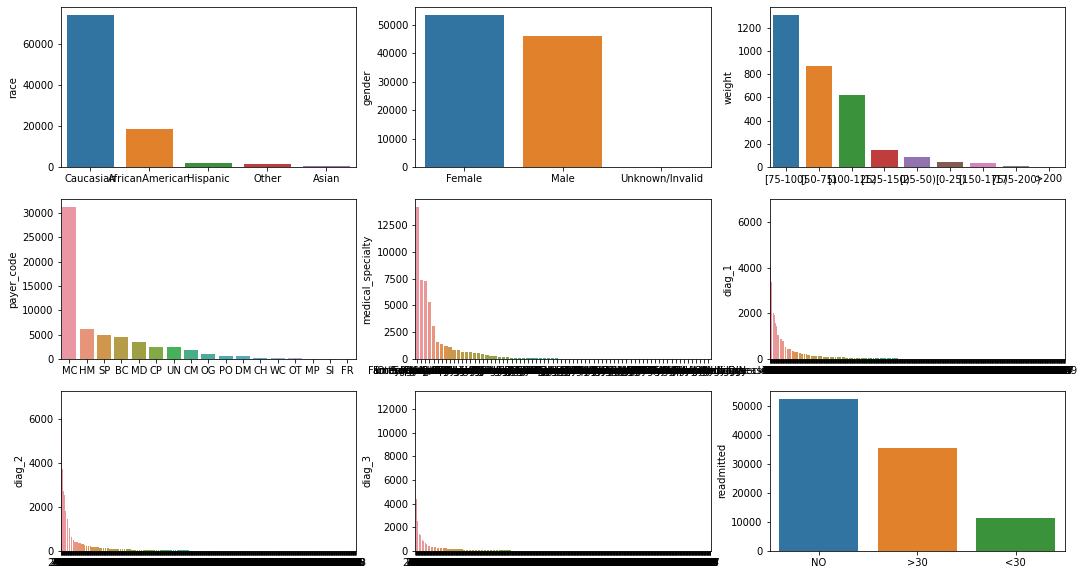

In [18]:
categ1=['race', 'gender', 'weight','payer_code', 'medical_specialty','diag_1',
       'diag_2', 'diag_3','readmitted']

plt.figure(figsize=(18,10))
for i in range(0,len(categ1)):
    plt.subplot(3,3,i+1) 
    sns.barplot(x=df[categ1[i]].value_counts().index, y=df[categ1[i]].value_counts())

De las graficas anteriores podemos ver varias cosas:
1. La data esta desbalanciada y eso puede generar errores en los modelos.
2. Existe skewness en muchas variables tambien, directamente no es grave pero se podria revisar generar una normalizacion de los datos.
3. Hay columnas con demasiadas variables como diag_1,diag_2 y diag_3. Estas columnas son dificiles de tratar y probablemente hacer OneHotEncoding puede terminar en un modelo muy complicado con demasiadas variables.
4. La variable weight tiene muchas nulos, por lo tanto sera eliminado

In [19]:
df.weight.value_counts()

[75-100)     1312
[50-75)       867
[100-125)     617
[125-150)     143
[25-50)        90
[0-25)         48
[150-175)      34
[175-200)      11
>200            3
Name: weight, dtype: int64

In [20]:
df=df.drop("weight", 1)

# Two variable analysis

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

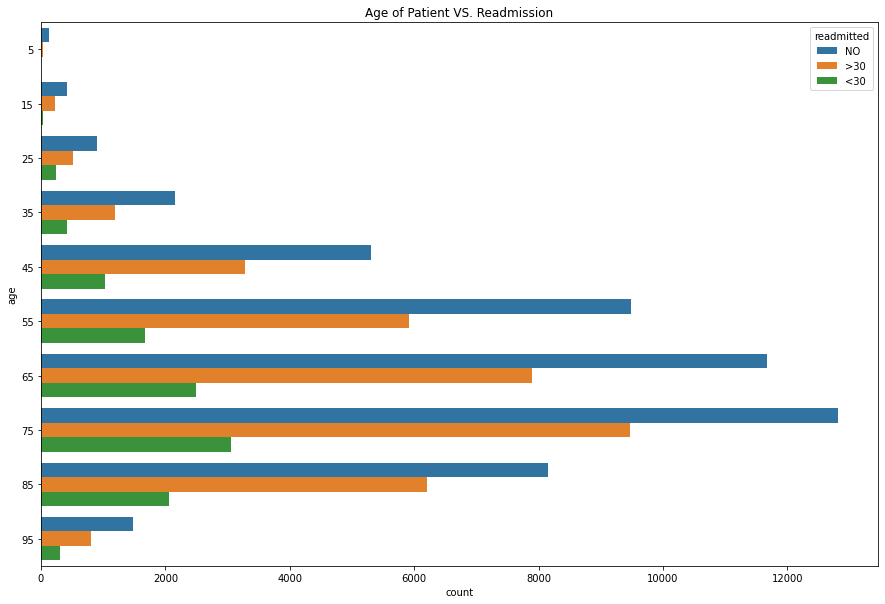

In [21]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

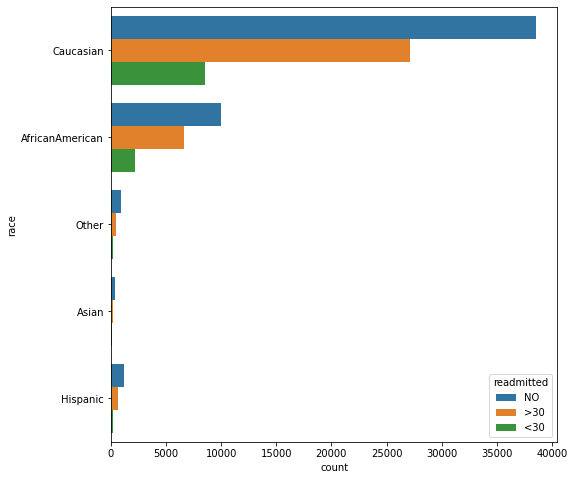

In [22]:
fig = plt.figure(figsize=(8,8))
sns.countplot(y = df['race'], hue = df['readmitted'])

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

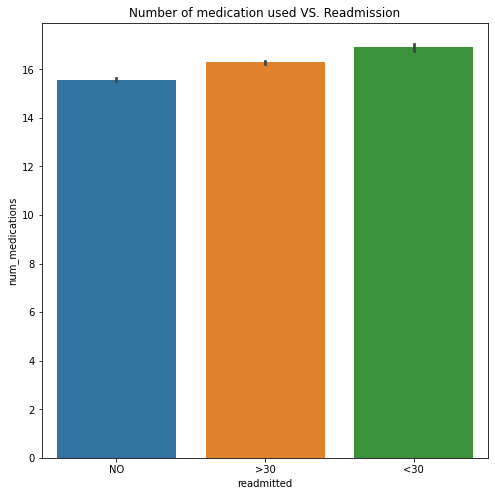

In [23]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

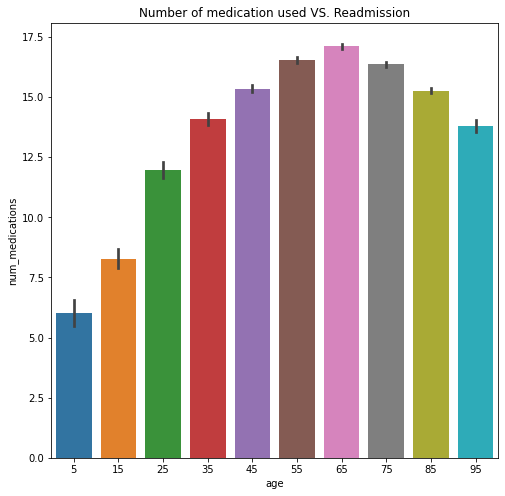

In [24]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['age'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

Para este caso no realizamos varias combinaciones de variables debido a que son muchas columnas, sin embargo se tomaron algunas columnas que pueden ser represententativas para ver la distribución de los datos. En este caso las variables edad y numero de medicamentos estan balanceados mientras que la edad raza no lo esta.

# Feature engineering

Se realizara una evaluación por medio de chi2 para ver que varibles son significativas y tienen relación con la variable objetivo readmitted.

In [25]:
categorical_features = ['race', 'gender','payer_code', 'medical_specialty','diag_1',
       'diag_2', 'diag_3']
rejected_features=[]
for col in categorical_features : 
    data_crosstab = pd.crosstab(df['readmitted'],  
                                df[col], 
                                margins = False) 

    stat, p, dof, expected = scipy.stats.chi2_contingency(data_crosstab)
    if p < 0.4 :
        print(p, col, 'is significant')
    else:
        print(p, col, 'is not significant')
        rejected_features.append(col)

5.221441704765939e-19 race is significant
5.619898642353818e-07 gender is significant
2.8714515468893607e-99 payer_code is significant
2.0557841853503425e-189 medical_specialty is significant
0.0 diag_1 is significant
7.531981225460146e-237 diag_2 is significant
1.7430742486633155e-223 diag_3 is significant


In [26]:

numeric_features=['age','admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient','number_diagnoses','max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']

for col in numeric_features :
    rho , pval = scipy.stats.spearmanr(df['readmitted'], df[col])
    if pval < 0.4 : 
        print(col, 'is significant')
    else : 
        print(col, 'is not significant')
        rejected_features.append(col)

age is significant
admission_type_id is significant
discharge_disposition_id is significant
admission_source_id is significant
time_in_hospital is significant
num_lab_procedures is significant
num_procedures is significant
num_medications is significant
number_outpatient is significant
number_emergency is significant
number_inpatient is significant
number_diagnoses is significant
max_glu_serum is significant
A1Cresult is significant
metformin is significant
repaglinide is significant
nateglinide is significant
chlorpropamide is not significant
glimepiride is not significant
acetohexamide is not significant
glipizide is significant
glyburide is significant
tolbutamide is significant
pioglitazone is significant
rosiglitazone is significant
acarbose is significant
miglitol is not significant
troglitazone is not significant
tolazamide is significant
examide is not significant


/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


citoglipton is not significant
insulin is significant
glyburide-metformin is not significant
glipizide-metformin is not significant
glimepiride-pioglitazone is not significant
metformin-rosiglitazone is significant
metformin-pioglitazone is significant
change is significant
diabetesMed is significant
readmitted is significant


En este caso se eliminaran las columnas que no son significativas.

In [27]:
df = df.drop(rejected_features, 1)

# Correlation

Tambien calcularemos la correlacción entre las variables para ver que variables estan fuertemente relacionadas con la variable objetivo.

In [28]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'tolazamide', 'insulin', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [29]:
df.readmitted.value_counts()

NO     52527
>30    35502
<30    11314
Name: readmitted, dtype: int64

In [30]:
df['readmitted'] = df['readmitted'].replace('>30', 2)
df['readmitted'] = df['readmitted'].replace('<30', 1)
df['readmitted'] = df['readmitted'].replace('NO', 0)

In [31]:
df.corr()['readmitted'][:-1]

encounter_id               -0.037922
patient_nbr                 0.080410
age                         0.039341
admission_type_id          -0.004736
discharge_disposition_id   -0.003077
admission_source_id         0.047162
time_in_hospital            0.046317
num_lab_procedures          0.044823
num_procedures             -0.041799
num_medications             0.042954
number_outpatient           0.084340
number_emergency            0.091103
number_inpatient            0.185237
number_diagnoses            0.115560
max_glu_serum               0.020412
A1Cresult                  -0.016927
metformin                  -0.028440
repaglinide                 0.017197
nateglinide                 0.004291
glipizide                   0.013499
glyburide                  -0.008123
tolbutamide                -0.001796
pioglitazone                0.010852
rosiglitazone               0.012004
acarbose                    0.016121
tolazamide                 -0.004309
insulin                     0.003430
m

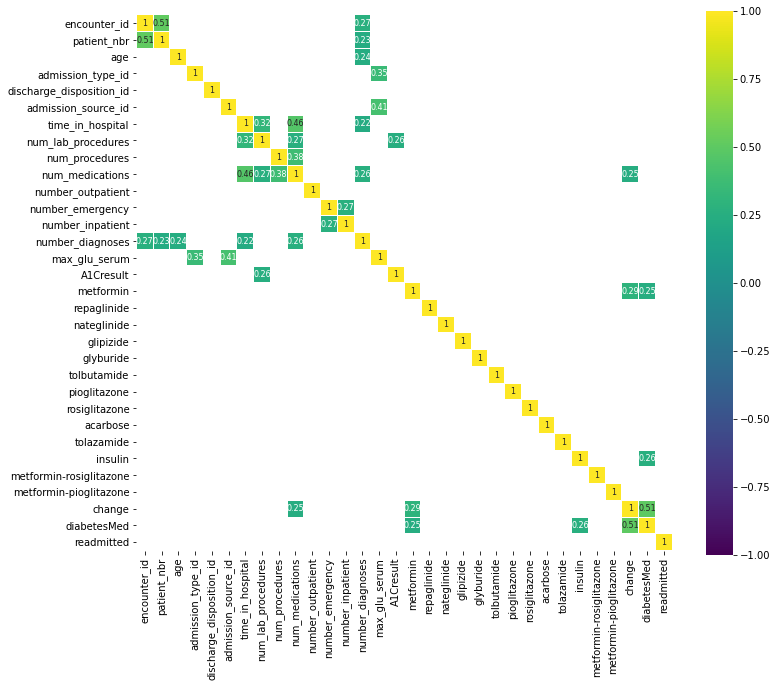

In [32]:
corr = df.corr() 
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Ninguna variable tiene mucha relación con la variable objetivo y aun tenemos vastantes varriables, por lo tanto pasaremos a elegir las variables con otro metodo.

# Selecting most important features

In [33]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'glipizide', 'glyburide',
       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'tolazamide', 'insulin', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [34]:
enc = OrdinalEncoder()

df[["payer_code", "medical_specialty", "diag_1", "diag_2","diag_3"]]= enc.fit_transform(df[["payer_code", "medical_specialty", "diag_1", "diag_2","diag_3"]])

cat_variables=df[["race","gender"]]
onehot_v = pd.get_dummies(cat_variables, drop_first=True)
df = pd.concat([df,onehot_v], axis=1);
df = df.drop(["race","gender"], 1)

df['payer_code']=df.replace(df.payer_code.mode(),np.nan)
df['medical_specialty']=df.replace(df.medical_specialty.mode(),np.nan)


In [35]:
y=df['readmitted']
X=df.drop(["readmitted"], 1)

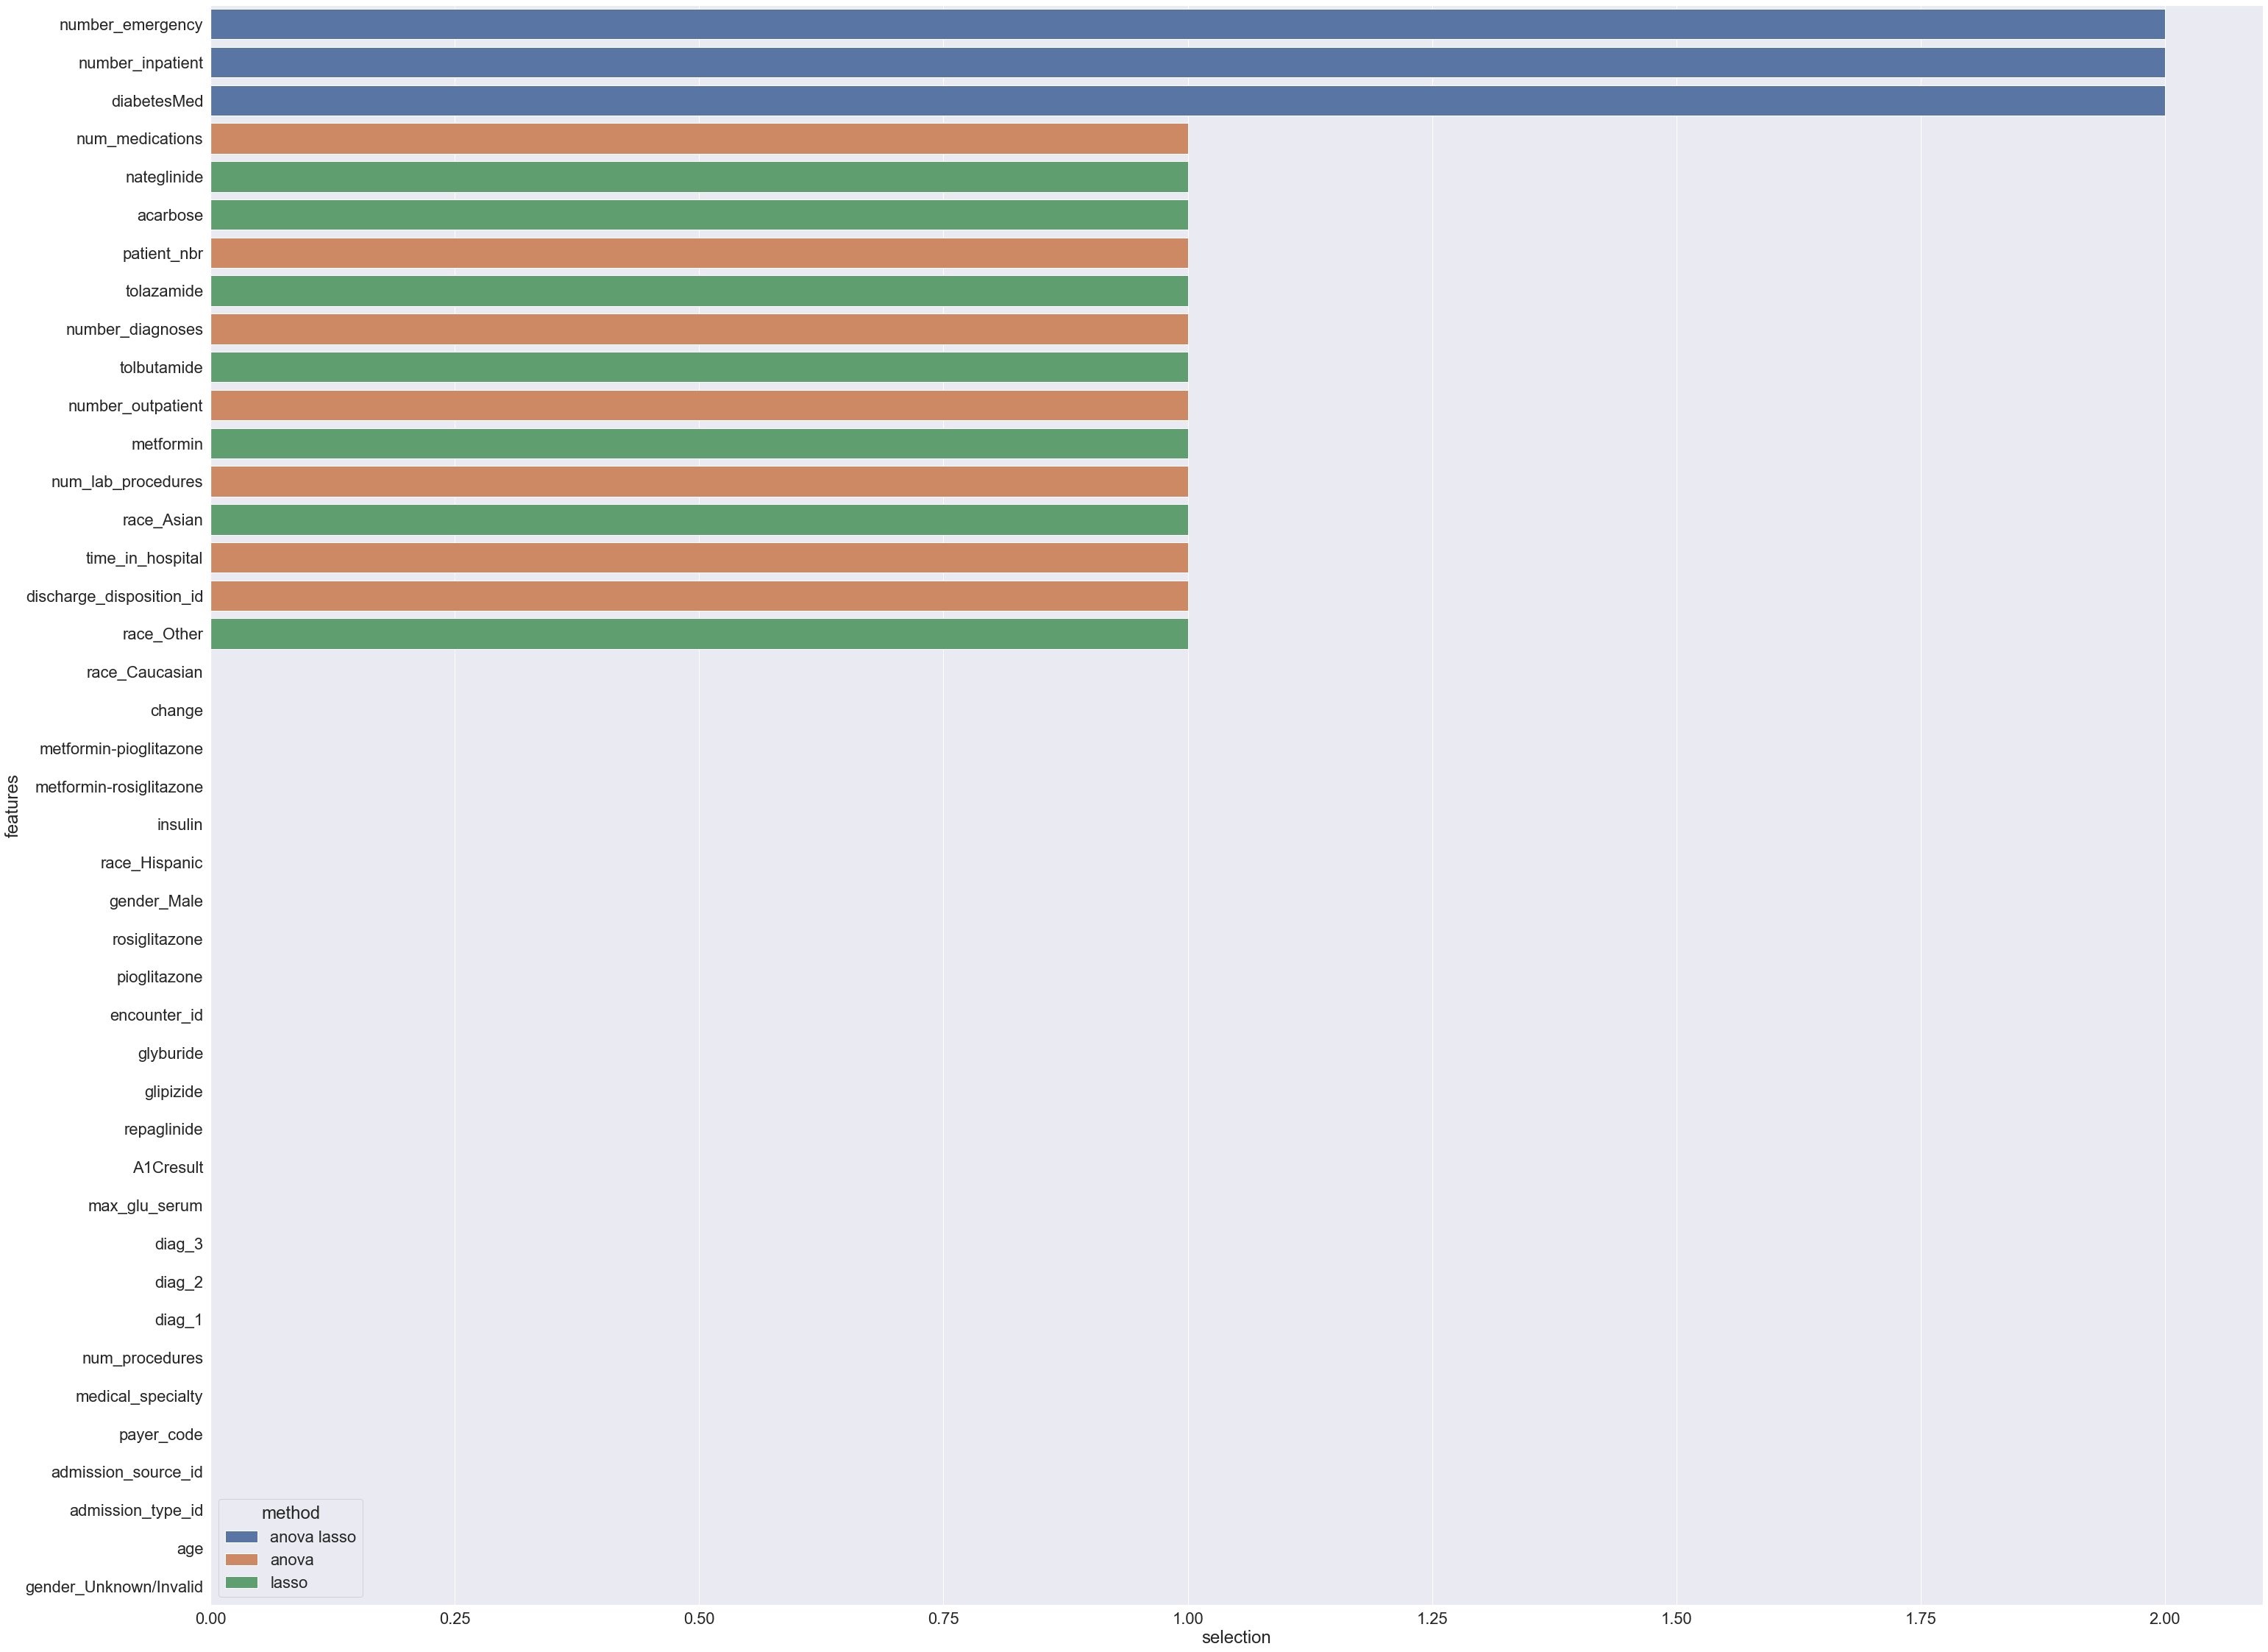

In [36]:

feature_names =  X.columns
## Anova
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_classif, k=10).fit(X,y)
anova_selected_features = feature_names[selector.get_support()]

## Lasso regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.LogisticRegression(C=1, penalty="l1", 
              solver='liblinear'), max_features=10).fit(X,y)
lasso_selected_features = feature_names[selector.get_support()]
 
## Plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["anova"] = dtf_features["features"].apply(lambda x: "anova" if x in anova_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in anova_selected_features else 0)
dtf_features["lasso"] = dtf_features["features"].apply(lambda x: "lasso" if x in lasso_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in lasso_selected_features else 0)
dtf_features["method"] = dtf_features[["anova","lasso"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]

sns.set(rc={'figure.figsize':(50,40)},font_scale = 2)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

En este casso utilizamos los modelos de anova y lasso (que tambiene es una prueba estadistica para ver las variables mas importantes en la predición de las variables objetivo) y elegimos las variables que los test decidan.

In [37]:
X=X[["number_emergency","number_inpatient","diabetesMed",'num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','race_Caucasian', 'race_Hispanic','number_diagnoses',
       'race_Other','nateglinide','acarbose','tolazamide','patient_nbr','discharge_disposition_id','time_in_hospital']]

# Balancing the data

Debido a que la variable objetivo esta desbalanceada realizaremos un balanceo. Existen varias formas de balancear como oversampling, undersampling y matching. En este caso utilizaremos oversampling porque es una de las formas mas simples de mejorar la data.

In [38]:
# instantiating the random over sampler 
ros = RandomOverSampler(random_state=51)


# resampling X, y
X_res, y_res = ros.fit_resample(X.values, y.values)
# new class distribution 
print(Counter(y_res))


Counter({0: 52527, 2: 52527, 1: 52527})


# Creating the model

LR: 0.333333 (0.002404)
DecisionTree: 0.743757 (0.003624)
NB: 0.380211 (0.002354)
RM: 0.790292 (0.002231)


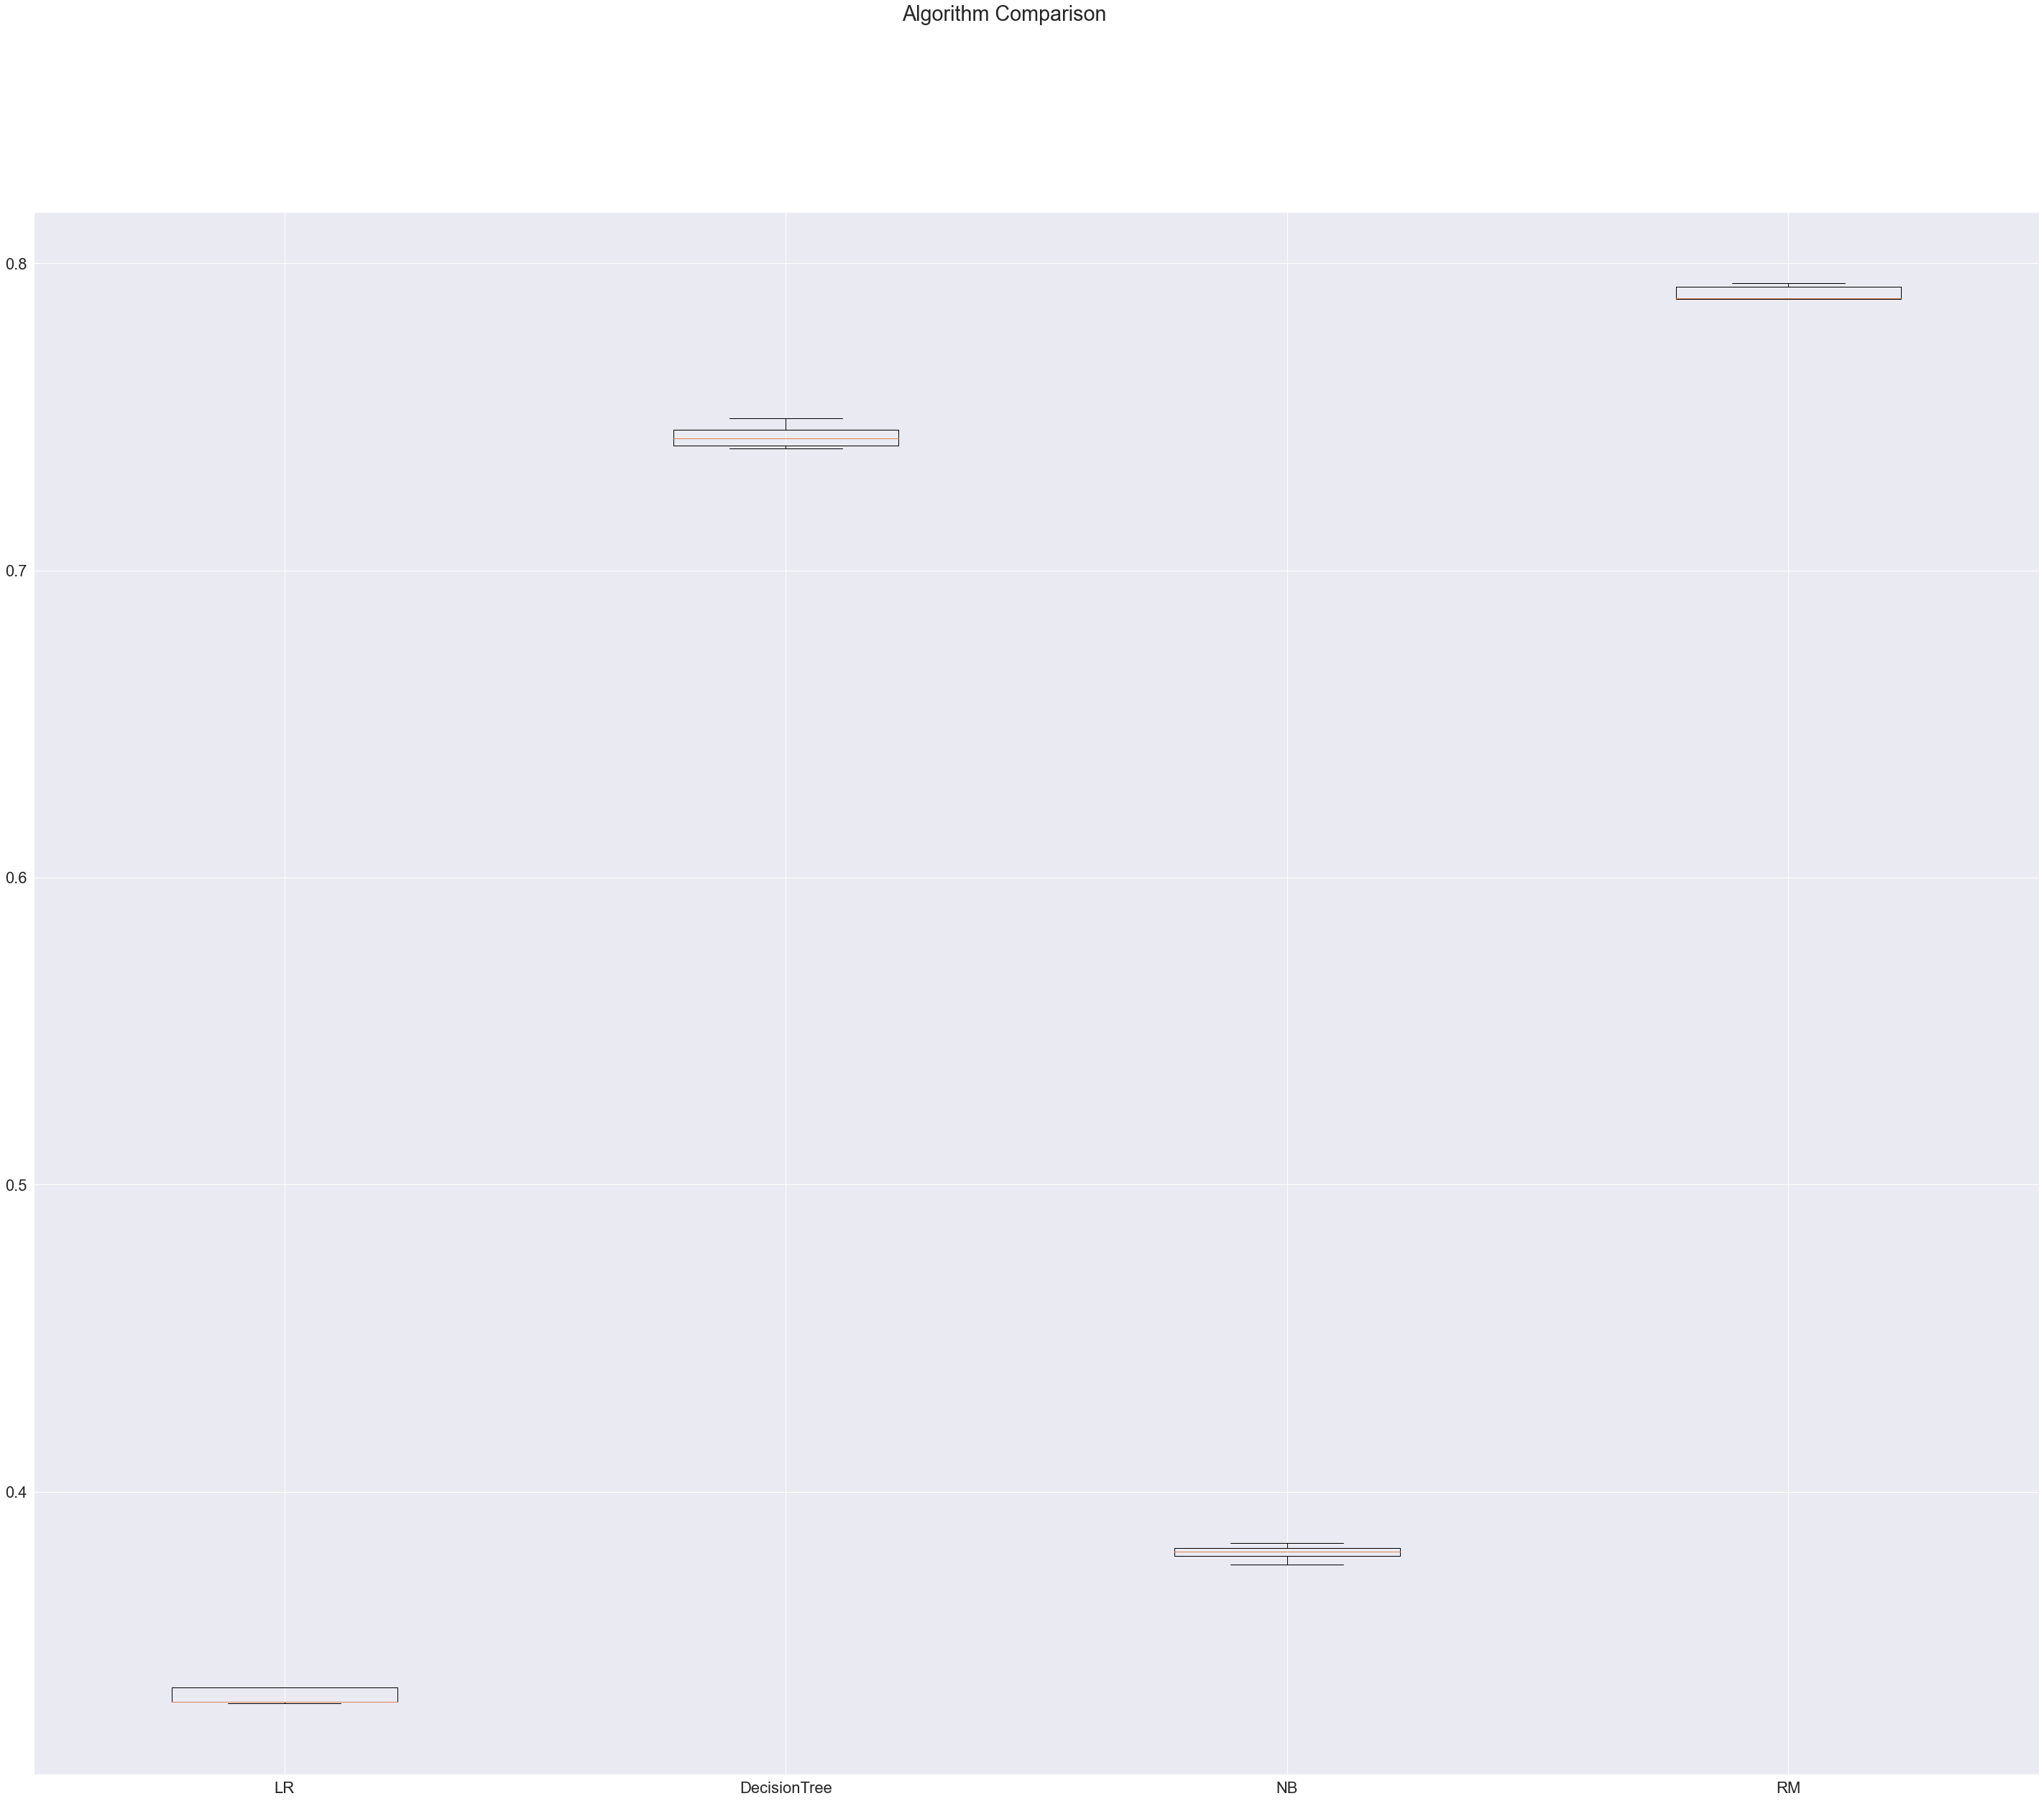

In [39]:

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('DecisionTree', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RM', RandomForestClassifier()))

seed = 7
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, random_state=seed,shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_res, y_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

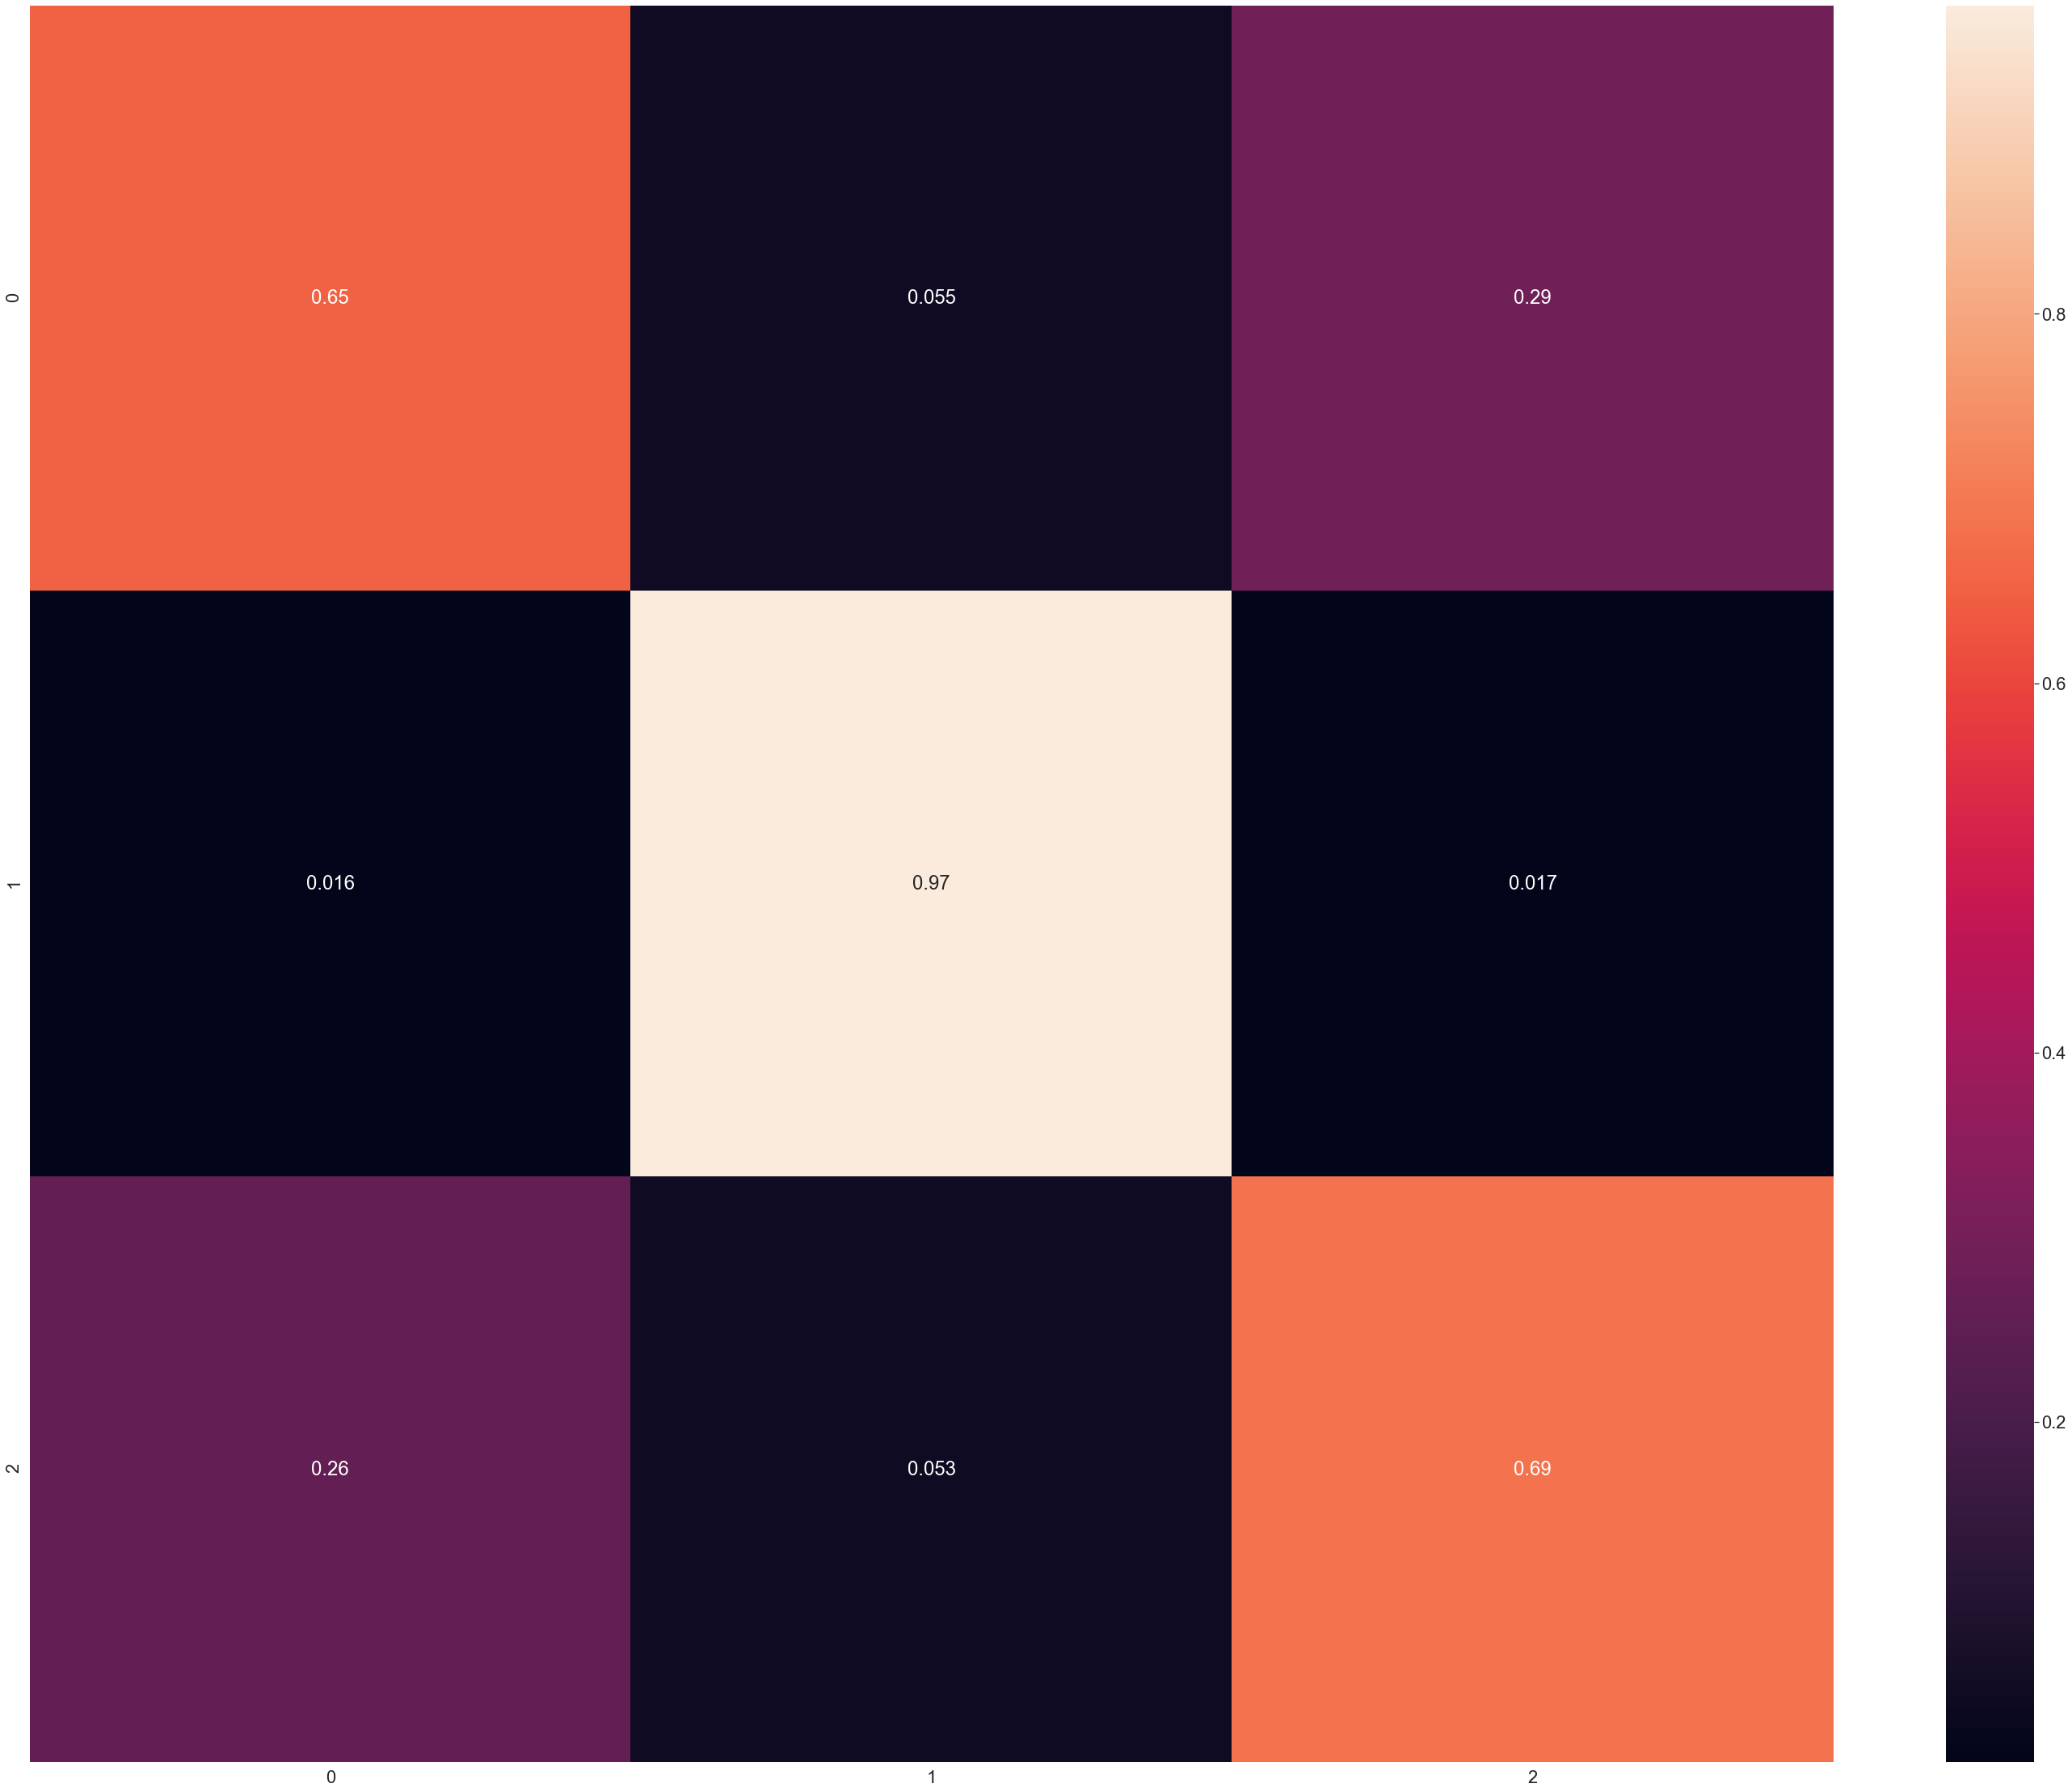

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.33, random_state=30)
model = RandomForestClassifier(random_state=2)
model = model.fit(X_train, y_train)
predictions = model.predict(X_test)
cm1 = confusion_matrix(y_test, predictions)
cm1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
sns.heatmap(cm1, annot=True) # font size
plt.show()

# Future work

1. Fundamental work is to improve the selection of the most important features.
2. Try another type of sampling like matching.
3. Try more advanced models like SVC or a deep learning library like keras.